In [ ]:
# Code to build CNN model
#Author: Srinija Sirobhushanam
#Title: Building Convolution Neural Networks 

In [13]:
# Import all necessary libraries
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#Load train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
#check the shape of the training and testing samples
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'testing examples’')

50000 training examples
10000 testing examples’


In [16]:
# one hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
# initialize the variables
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True

In [18]:
# Build the model
model = Sequential()
model.add(Conv2D(6, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
# Transform data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [20]:
x_train /= 255
x_test /= 255

In [21]:
# compile the model
opt = keras.optimizers.adam()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [22]:
# provide option for data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and real time data augmentation:
    datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
        )

Using real-time data augmentation.


In [23]:
# fit the data
datagen.fit(x_train)

In [24]:
from numpy.random import seed
seed(1)

In [25]:
# fit the data
history=  model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),

                        epochs=10,
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        validation_data=(x_test, y_test),
                        shuffle= False)

Epoch 1/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.6446 - acc: 0.3965 - val_loss: 1.2849 - val_acc: 0.5254
Epoch 2/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.3542 - acc: 0.5124 - val_loss: 1.1176 - val_acc: 0.5963
Epoch 3/10
1562/1562 [==============================] - 30s 20ms/step - loss: 1.2303 - acc: 0.5592 - val_loss: 1.0342 - val_acc: 0.6336
Epoch 4/10
1562/1562 [==============================] - 30s 20ms/step - loss: 1.1436 - acc: 0.5957 - val_loss: 0.9514 - val_acc: 0.6617
Epoch 5/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.0872 - acc: 0.6163 - val_loss: 0.9428 - val_acc: 0.6679
Epoch 6/10
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0490 - acc: 0.6292 - val_loss: 0.9300 - val_acc: 0.6714
Epoch 7/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.0069 - acc: 0.6468 - val_loss: 0.8614 - val_acc: 0.7006
Epoch 8/10
1562/1562 [==========================

In [26]:
# print the metrics
scores = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print("Test Accuracy",scores[1]*100)
print("Loss value",scores[0])

10000/10000 [==============================] - 1s 149us/step
Test Accuracy 69.35
Loss value 0.886586911201477


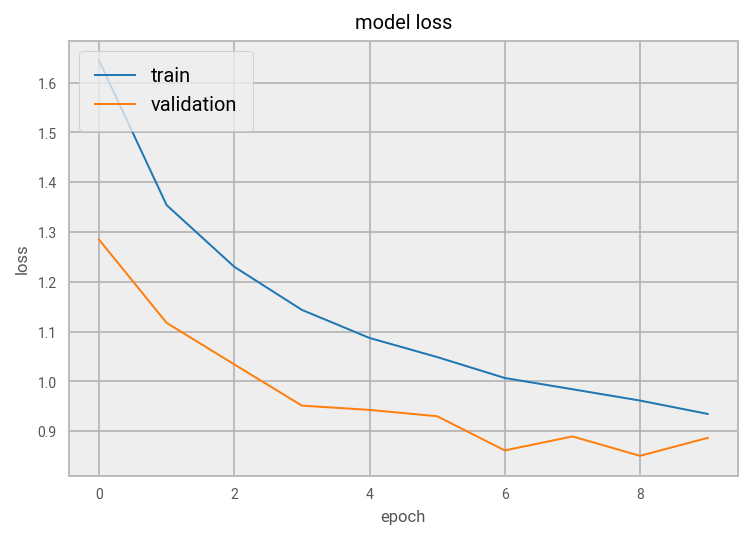

In [27]:
# evaluate results

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plotLosses(history)

In [28]:
# using learning rate scheduler

def lr_schedule(epoch):
    lrate = 0.0001
    if epoch > 5:
        lrate = 0.00005
    if epoch > 10:
        lrate = 0.00003
    return lrate

In [29]:
# recompile and re fit the model using Learning rate scheduler
from keras.callbacks import LearningRateScheduler
opt = keras.optimizers.adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

from numpy.random import seed
seed(1)
history= model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=10,\
                    verbose=1,validation_data=(x_test,y_test), shuffle= False, callbacks=[LearningRateScheduler(lr_schedule)])


Epoch 1/10
1562/1562 [==============================] - 32s 20ms/step - loss: 0.8503 - acc: 0.7029 - val_loss: 0.7881 - val_acc: 0.7289
Epoch 2/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.8236 - acc: 0.7113 - val_loss: 0.7956 - val_acc: 0.7295
Epoch 3/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.8237 - acc: 0.7143 - val_loss: 0.8001 - val_acc: 0.7268
Epoch 4/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.8055 - acc: 0.7197 - val_loss: 0.7803 - val_acc: 0.7359
Epoch 5/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.7922 - acc: 0.7222 - val_loss: 0.7562 - val_acc: 0.7417
Epoch 6/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.7854 - acc: 0.7260 - val_loss: 0.7672 - val_acc: 0.7393
Epoch 7/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.7707 - acc: 0.7295 - val_loss: 0.7467 - val_acc: 0.7452
Epoch 8/10
1562/1562 [==========================

In [30]:
scores = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print("Test Accuracy",scores[1]*100)
print("Loss value",scores[0])

10000/10000 [==============================] - 2s 167us/step
Test Accuracy 74.75
Loss value 0.7457273904800416


In [32]:
# addition of batch normalization layer to the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [33]:
# Recompile and re fit the model again
from keras.callbacks import LearningRateScheduler
opt = keras.optimizers.adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

from numpy.random import seed
seed(1)
history= model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=10,\
                    verbose=1,validation_data=(x_test,y_test), shuffle= False, callbacks=[LearningRateScheduler(lr_schedule)])


Epoch 1/10
1562/1562 [==============================] - 70s 45ms/step - loss: 1.5792 - acc: 0.4273 - val_loss: 1.2807 - val_acc: 0.5459
Epoch 2/10
1562/1562 [==============================] - 69s 44ms/step - loss: 1.2683 - acc: 0.5473 - val_loss: 1.0401 - val_acc: 0.6305
Epoch 3/10
1562/1562 [==============================] - 69s 44ms/step - loss: 1.1234 - acc: 0.6018 - val_loss: 1.0667 - val_acc: 0.6296
Epoch 4/10
1562/1562 [==============================] - 69s 44ms/step - loss: 1.0333 - acc: 0.6362 - val_loss: 1.1307 - val_acc: 0.6203
Epoch 5/10
1562/1562 [==============================] - 69s 44ms/step - loss: 0.9690 - acc: 0.6588 - val_loss: 0.9998 - val_acc: 0.6670
Epoch 6/10
1562/1562 [==============================] - 69s 44ms/step - loss: 0.9148 - acc: 0.6792 - val_loss: 0.8076 - val_acc: 0.7214
Epoch 7/10
1562/1562 [==============================] - 69s 44ms/step - loss: 0.8496 - acc: 0.7037 - val_loss: 0.8116 - val_acc: 0.7207
Epoch 8/10
1562/1562 [==========================

In [34]:
#Print the scores
scores = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print("Test Accuracy",scores[1]*100)
print("Loss value",scores[0])

10000/10000 [==============================] - 3s 278us/step
Test Accuracy 75.32
Loss value 0.734702967262268


In [13]:
# Applying transfer Learning using Resnet50 model
from matplotlib import pyplot
from scipy.misc import toimage
import keras
from keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.callbacks import Callback
import math
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
import matplotlib.pyplot as plt

In [28]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'testing examples’')
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

50000 training examples
10000 testing examples’


In [15]:
# Using pretrained model
convolution_base = ResNet50(weights= 'imagenet', include_top=False, input_shape=(32, 32, 3))
res_model= models.Sequential()
res_model.add(convolution_base)
res_model.add(layers.Flatten())
res_model.add(Dropout(0.2))
res_model.add(layers.Dense(10, activation='softmax'))
batch_size=32

/home/cdsw/.local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [16]:
# use data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [17]:
# using lr scheduler
def lr_schedule(epoch):
    lrate = 0.0001
    if epoch > 5:
        lrate = 0.00005
    if epoch > 10:
        lrate = 0.00003
    return lrate
opt_adam = keras.optimizers.Adam(lr=0.0001)
res_model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

In [18]:
# fit the model
from numpy.random import seed
seed(1)

history= res_model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=10,\
                    verbose=1,validation_data=(x_test,y_test), shuffle= False, callbacks=[LearningRateScheduler(lr_schedule)])


Epoch 1/10
1562/1562 [==============================] - 705s 451ms/step - loss: 1.4582 - acc: 0.5251 - val_loss: 0.9990 - val_acc: 0.6782
Epoch 2/10
1562/1562 [==============================] - 687s 440ms/step - loss: 0.9227 - acc: 0.6879 - val_loss: 0.8375 - val_acc: 0.7240
Epoch 3/10
1562/1562 [==============================] - 688s 441ms/step - loss: 0.7890 - acc: 0.7328 - val_loss: 0.7963 - val_acc: 0.7529
Epoch 4/10
1562/1562 [==============================] - 687s 440ms/step - loss: 0.7511 - acc: 0.7506 - val_loss: 0.8870 - val_acc: 0.7374
Epoch 5/10
1562/1562 [==============================] - 691s 442ms/step - loss: 0.7173 - acc: 0.7635 - val_loss: 0.7737 - val_acc: 0.7560
Epoch 6/10
1562/1562 [==============================] - 692s 443ms/step - loss: 0.7162 - acc: 0.7662 - val_loss: 0.7586 - val_acc: 0.7841
Epoch 7/10
1562/1562 [==============================] - 687s 440ms/step - loss: 0.5697 - acc: 0.8076 - val_loss: 0.5344 - val_acc: 0.8220
Epoch 8/10
1562/1562 [============

In [19]:
# evaluate the results
scores = res_model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print("Test Accuracy",scores[1]*100)
print("Loss value",scores[0])

10000/10000 [==============================] - 8s 791us/step
Test Accuracy 83.23
Loss value 0.5033163224220276


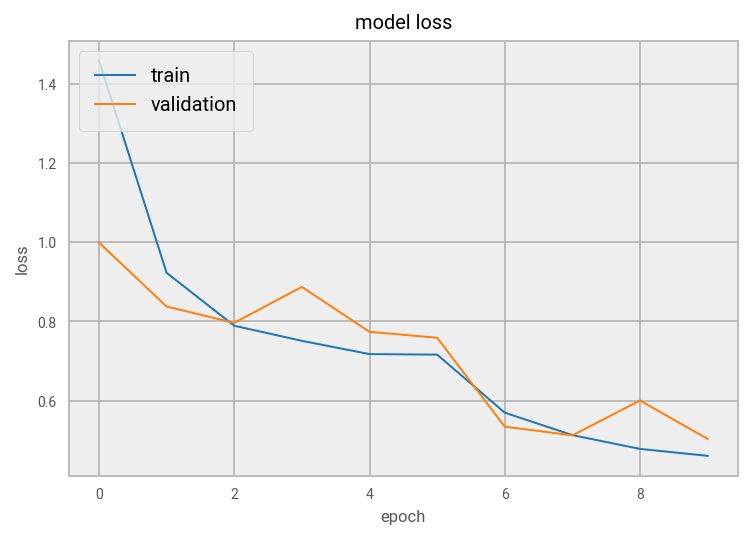

In [20]:
# plot the loss graphs
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plotLosses(history)

In [21]:
# visualization of the CNN activations
from keras.applications import ResNet50
from keras import backend as K
model = ResNet50(weights='imagenet', include_top=True)
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
img_path = 'tyson.jpeg' # You can input your image here or use the same image from assets
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted class:', decode_predictions(preds, top=1)[0]) # This will output the predicted label

Predicted class: [('n02111500', 'Great_Pyrenees', 0.5838813)]


(1, 224, 224, 3)


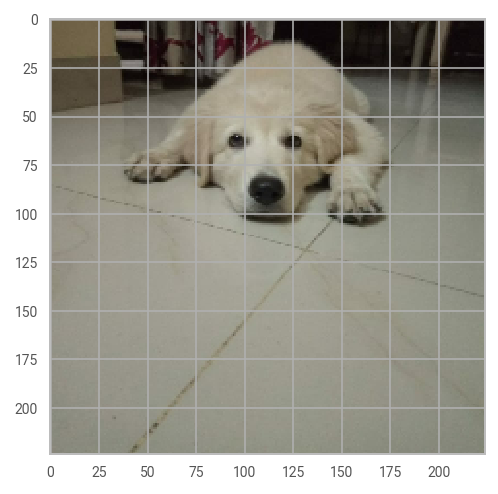

(1, 112, 112, 64)


In [22]:

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()
from keras import models

layer_outputs = [layer.output for layer in model.layers[1:]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

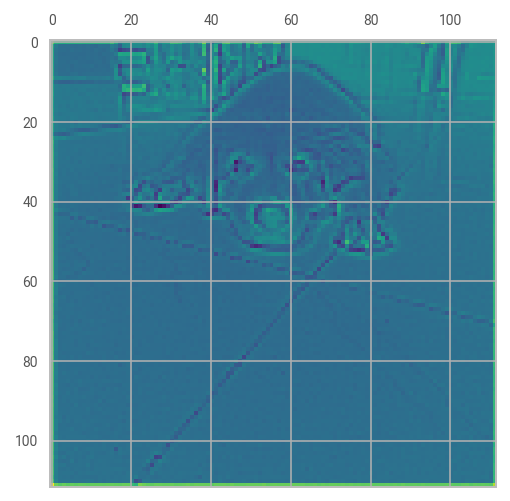

In [23]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

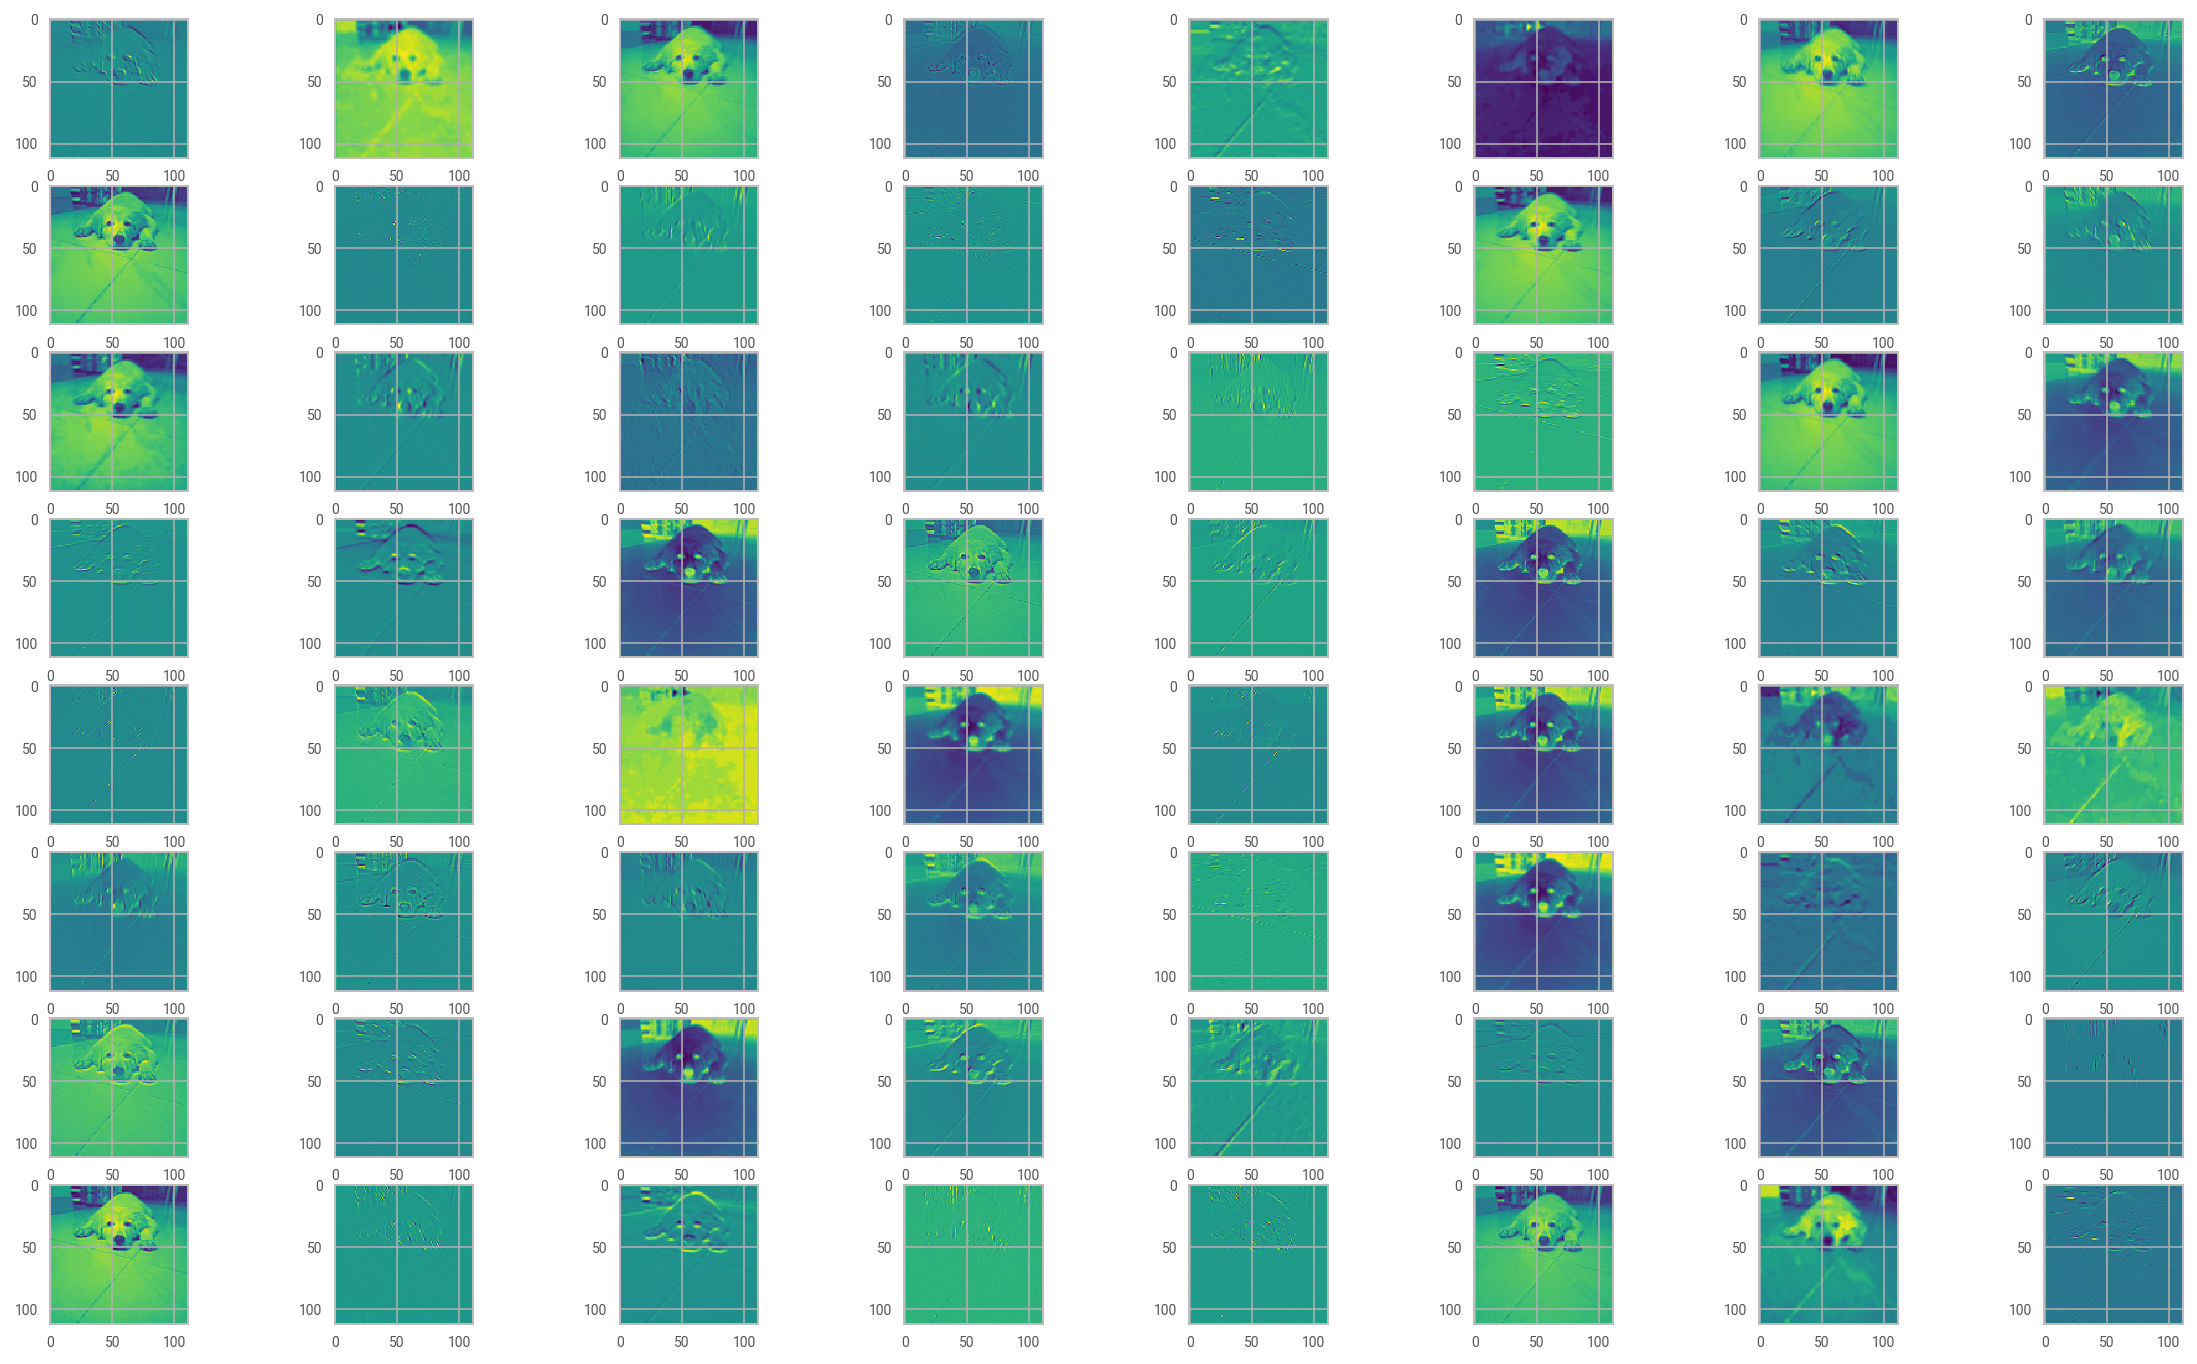

In [24]:
def display_outputs(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1


display_outputs(activations, 8, 8, 1)

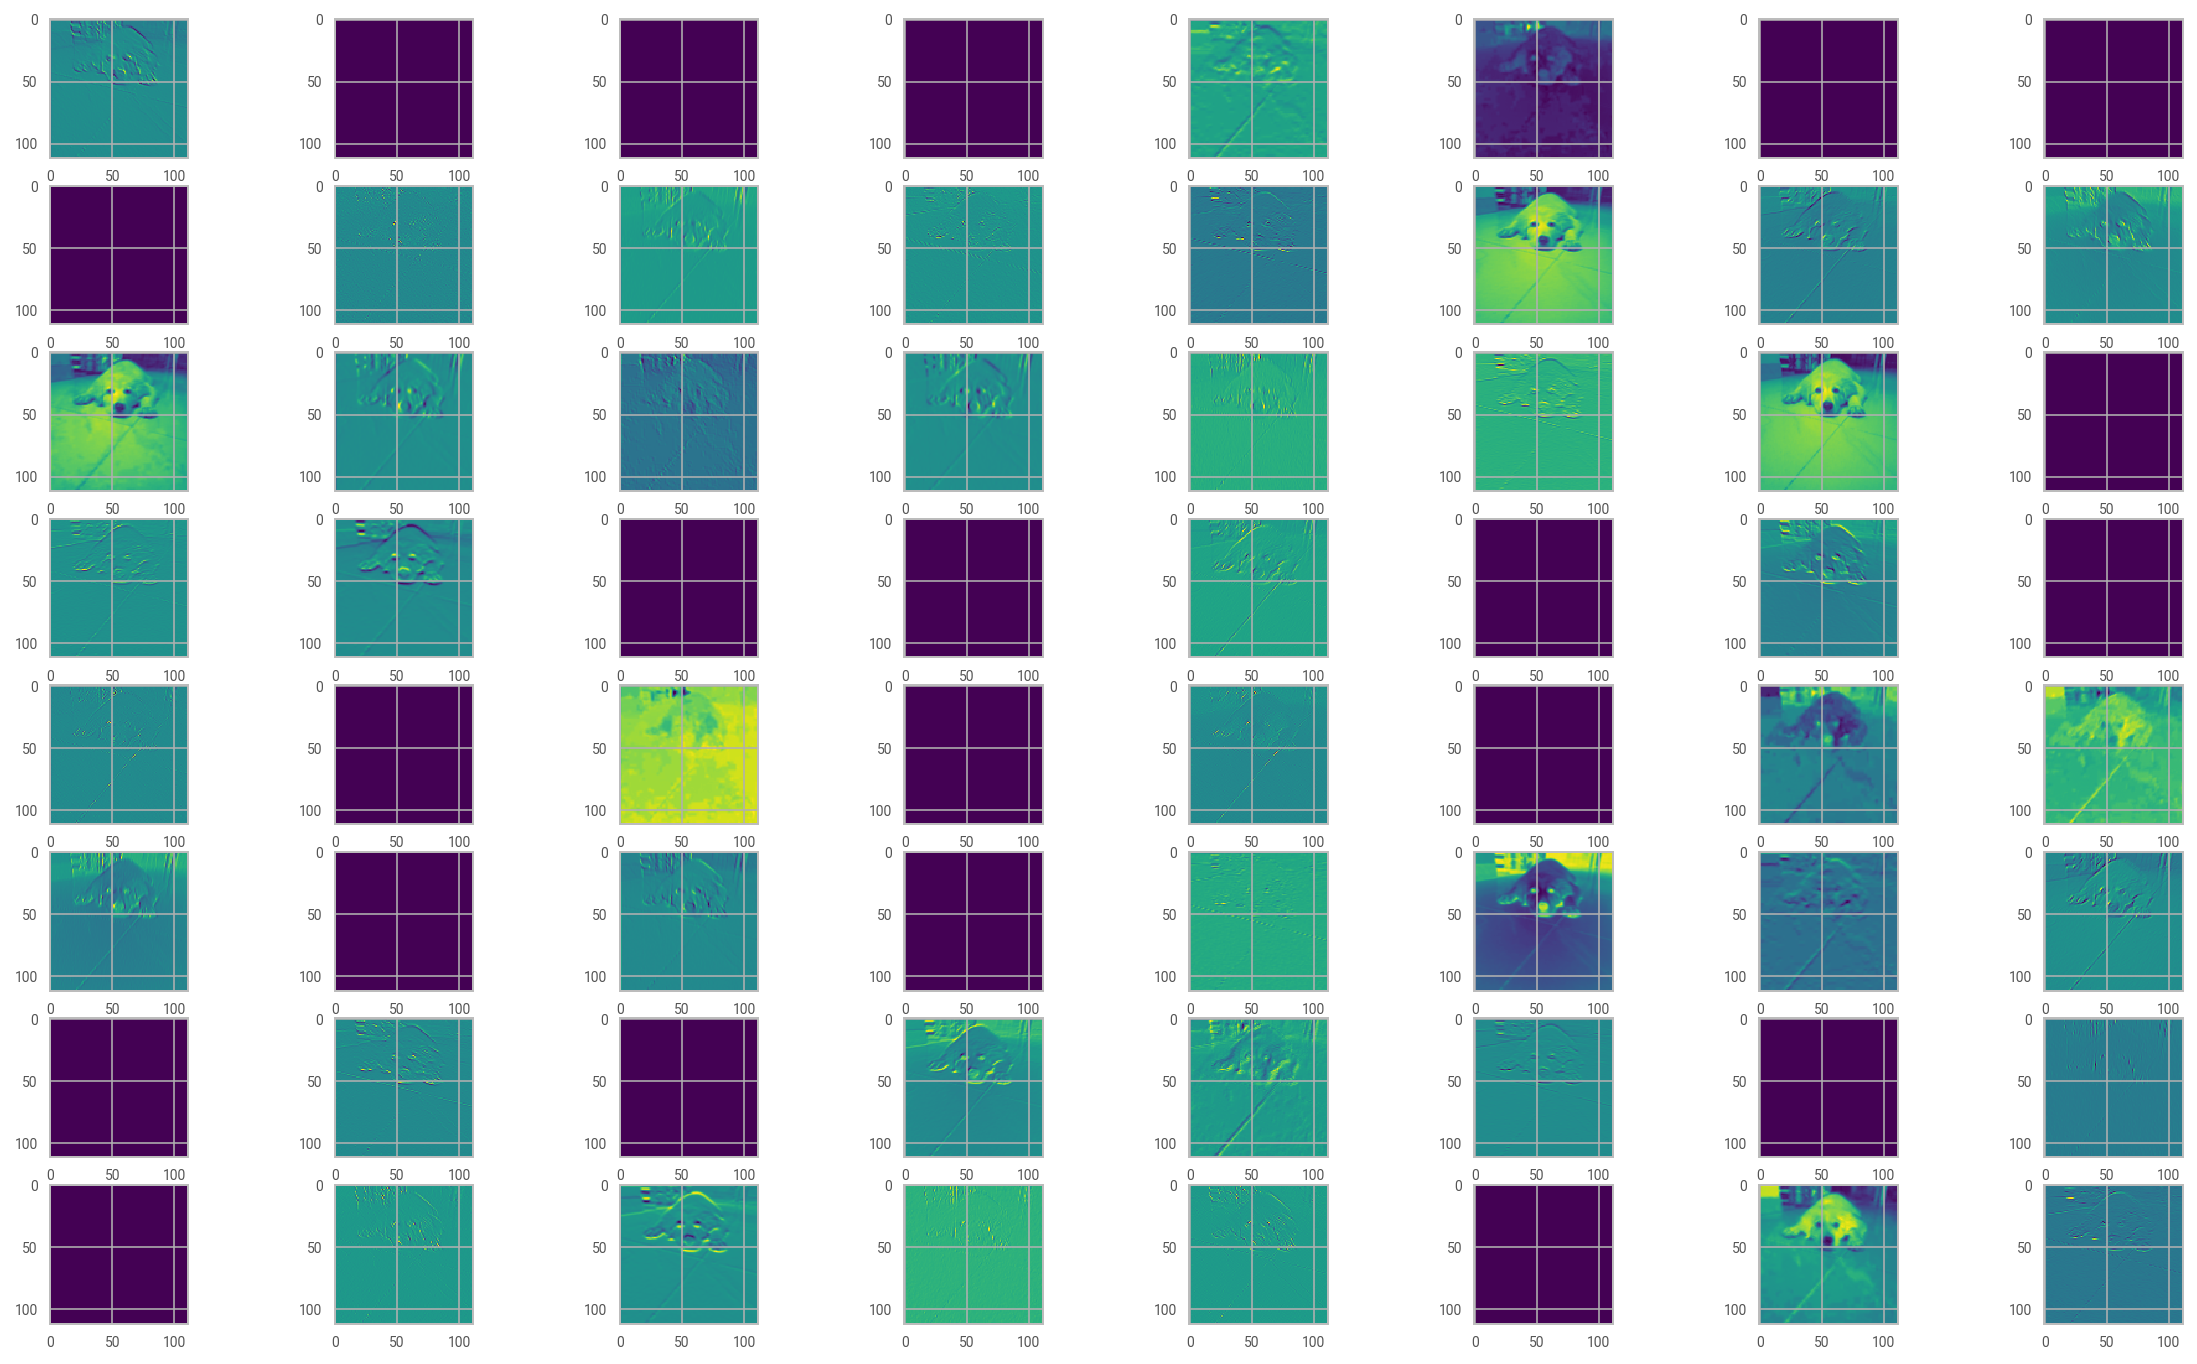

In [25]:
display_outputs(activations, 8, 8, 3)

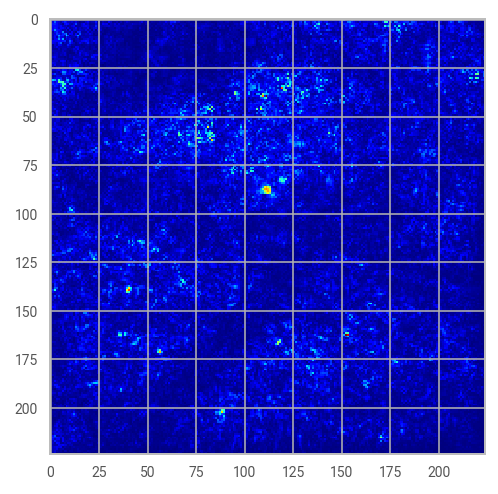

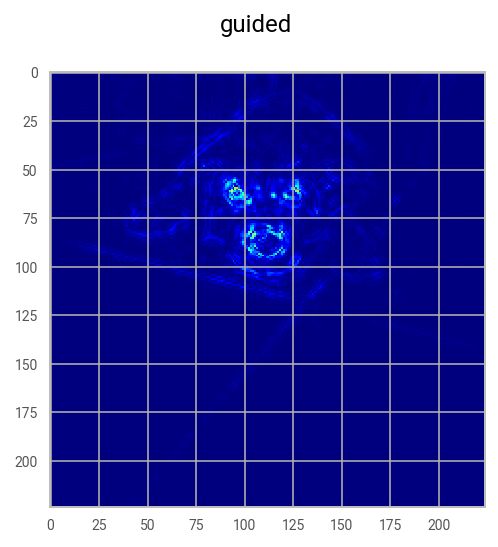

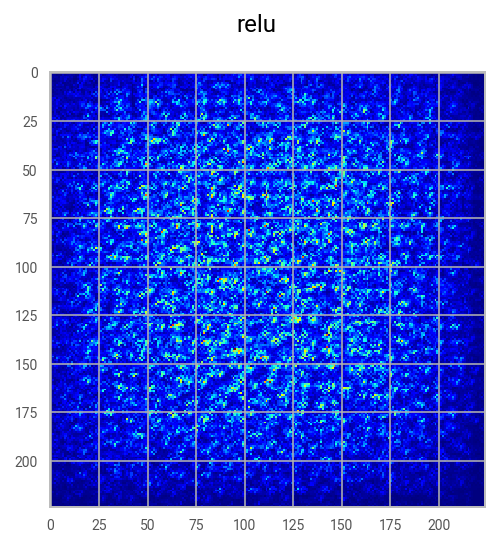

In [26]:
from vis.utils import utils
from keras import activations
import warnings
warnings.filterwarnings('ignore')
layer_idx = -1
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
img1 = utils.load_img('tyson.jpeg', target_size=(224, 224))
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
layer_idx = -1
grads = visualize_saliency(model, layer_idx, filter_indices=2, seed_input=img1)
plt.imshow(grads, cmap='jet')   

for modifier in ['guided', 'relu']:
    plt.figure()
    plt.suptitle(modifier)


    grads = visualize_saliency(model, layer_idx, filter_indices=2,
                                   seed_input=img1, backprop_modifier=modifier)  
    plt.imshow(grads, cmap='jet')

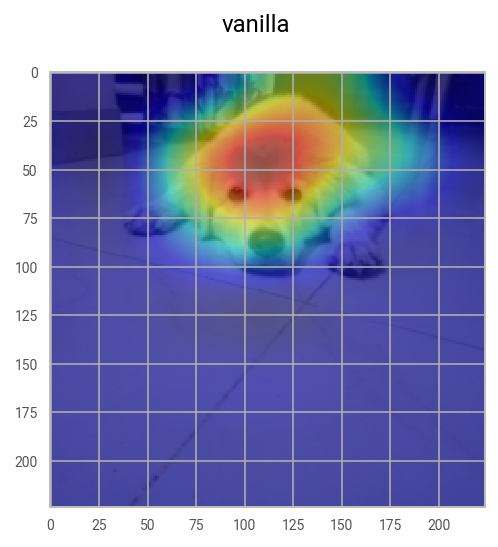

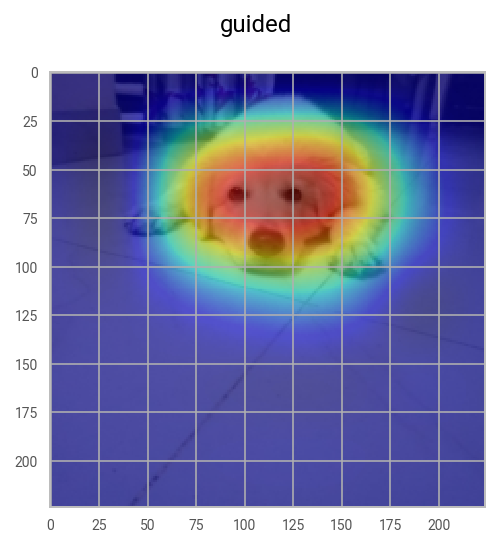

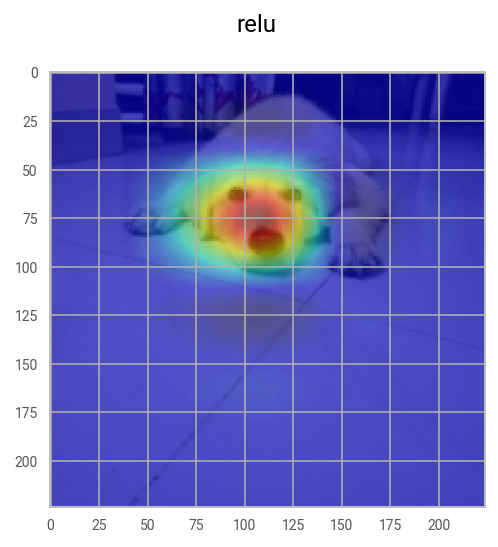

In [27]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'res5c_branch2c')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    plt.suptitle("vanilla" if modifier is None else modifier)

    
    grads = visualize_cam(model, layer_idx, filter_indices=2,
                              seed_input=img1, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # overlay the heatmap onto original image
    jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
    plt.imshow(overlay(jet_heatmap, img1))